In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import string
import math
import os

In [2]:
tbpath = "/Users/aavattikutis/Documents/epidemicmodel/cccruns/fits/fit13/tables/"
productpath = "../../results/"

In [3]:
f_ = os.listdir(tbpath)
models = [i for i in f_ if i[0]=='S']
# models = ["fulllinearmodel_fit_table.csv","reducedlinearmodelNegBinom_fit_table.csv",
#           "reducedlinearmodelq0_fit_table.csv","reducedlinearmodelq0ctime_fit_table.csv",
#          "nonlinearmodelq0ctime_fit_table.csv","nonlinearmodel_fit_table.csv"]
# model_hash = {}
# k = -1
# for model in models:
#     k += 1
#     model_hash[model] = string.ascii_uppercase[k]

# df = pd.DataFrame.from_dict(model_hash, orient='index')
# df.to_csv('../postmodel_derivatives/model_hash.csv', header=False)

In [4]:
rois = []
for model in models:
    df = pd.read_csv(tbpath + model) #get rois in all tables (some may have failed)
    rois += list(df.roi.unique())

    
rois = list(set(rois))
roi_us = np.sort([i for i in rois if i[:2]=='US'])[::-1]
roi_other = np.sort([i for i in rois if i[:2]!='US'])[::-1]

In [9]:
theta = "ifr (week 2)"
df2 = pd.DataFrame(columns=[i.split('_fit_table.csv')[0] for i in models])
print(df2.columns)
k = 0
for roi in rois:
#     print(roi)
    x = []
    for model in models:
        df = pd.read_csv(tbpath + model)
#         print(df.loc[(df.roi==roi)&(df['quantile']=='0.5'), theta])
        try:
            x.append(df.loc[(df.roi==roi)&(df['quantile']=='0.5'), theta].values[0])
        except:
            pass
    if len(x)==len(models):
        k += 1
#         print(x)
        df2.loc[k] = x 

Index(['SICRMQC2R', 'SICRM2R', 'SICRLM', 'SICRLMQC2R', 'SICRMQC', 'SICRM',
       'SICRMQ', 'SICRLMQC', 'SICRLMQ2R', 'SICRLMQ', 'SICRMQ2R', 'SICRLM2R'],
      dtype='object')


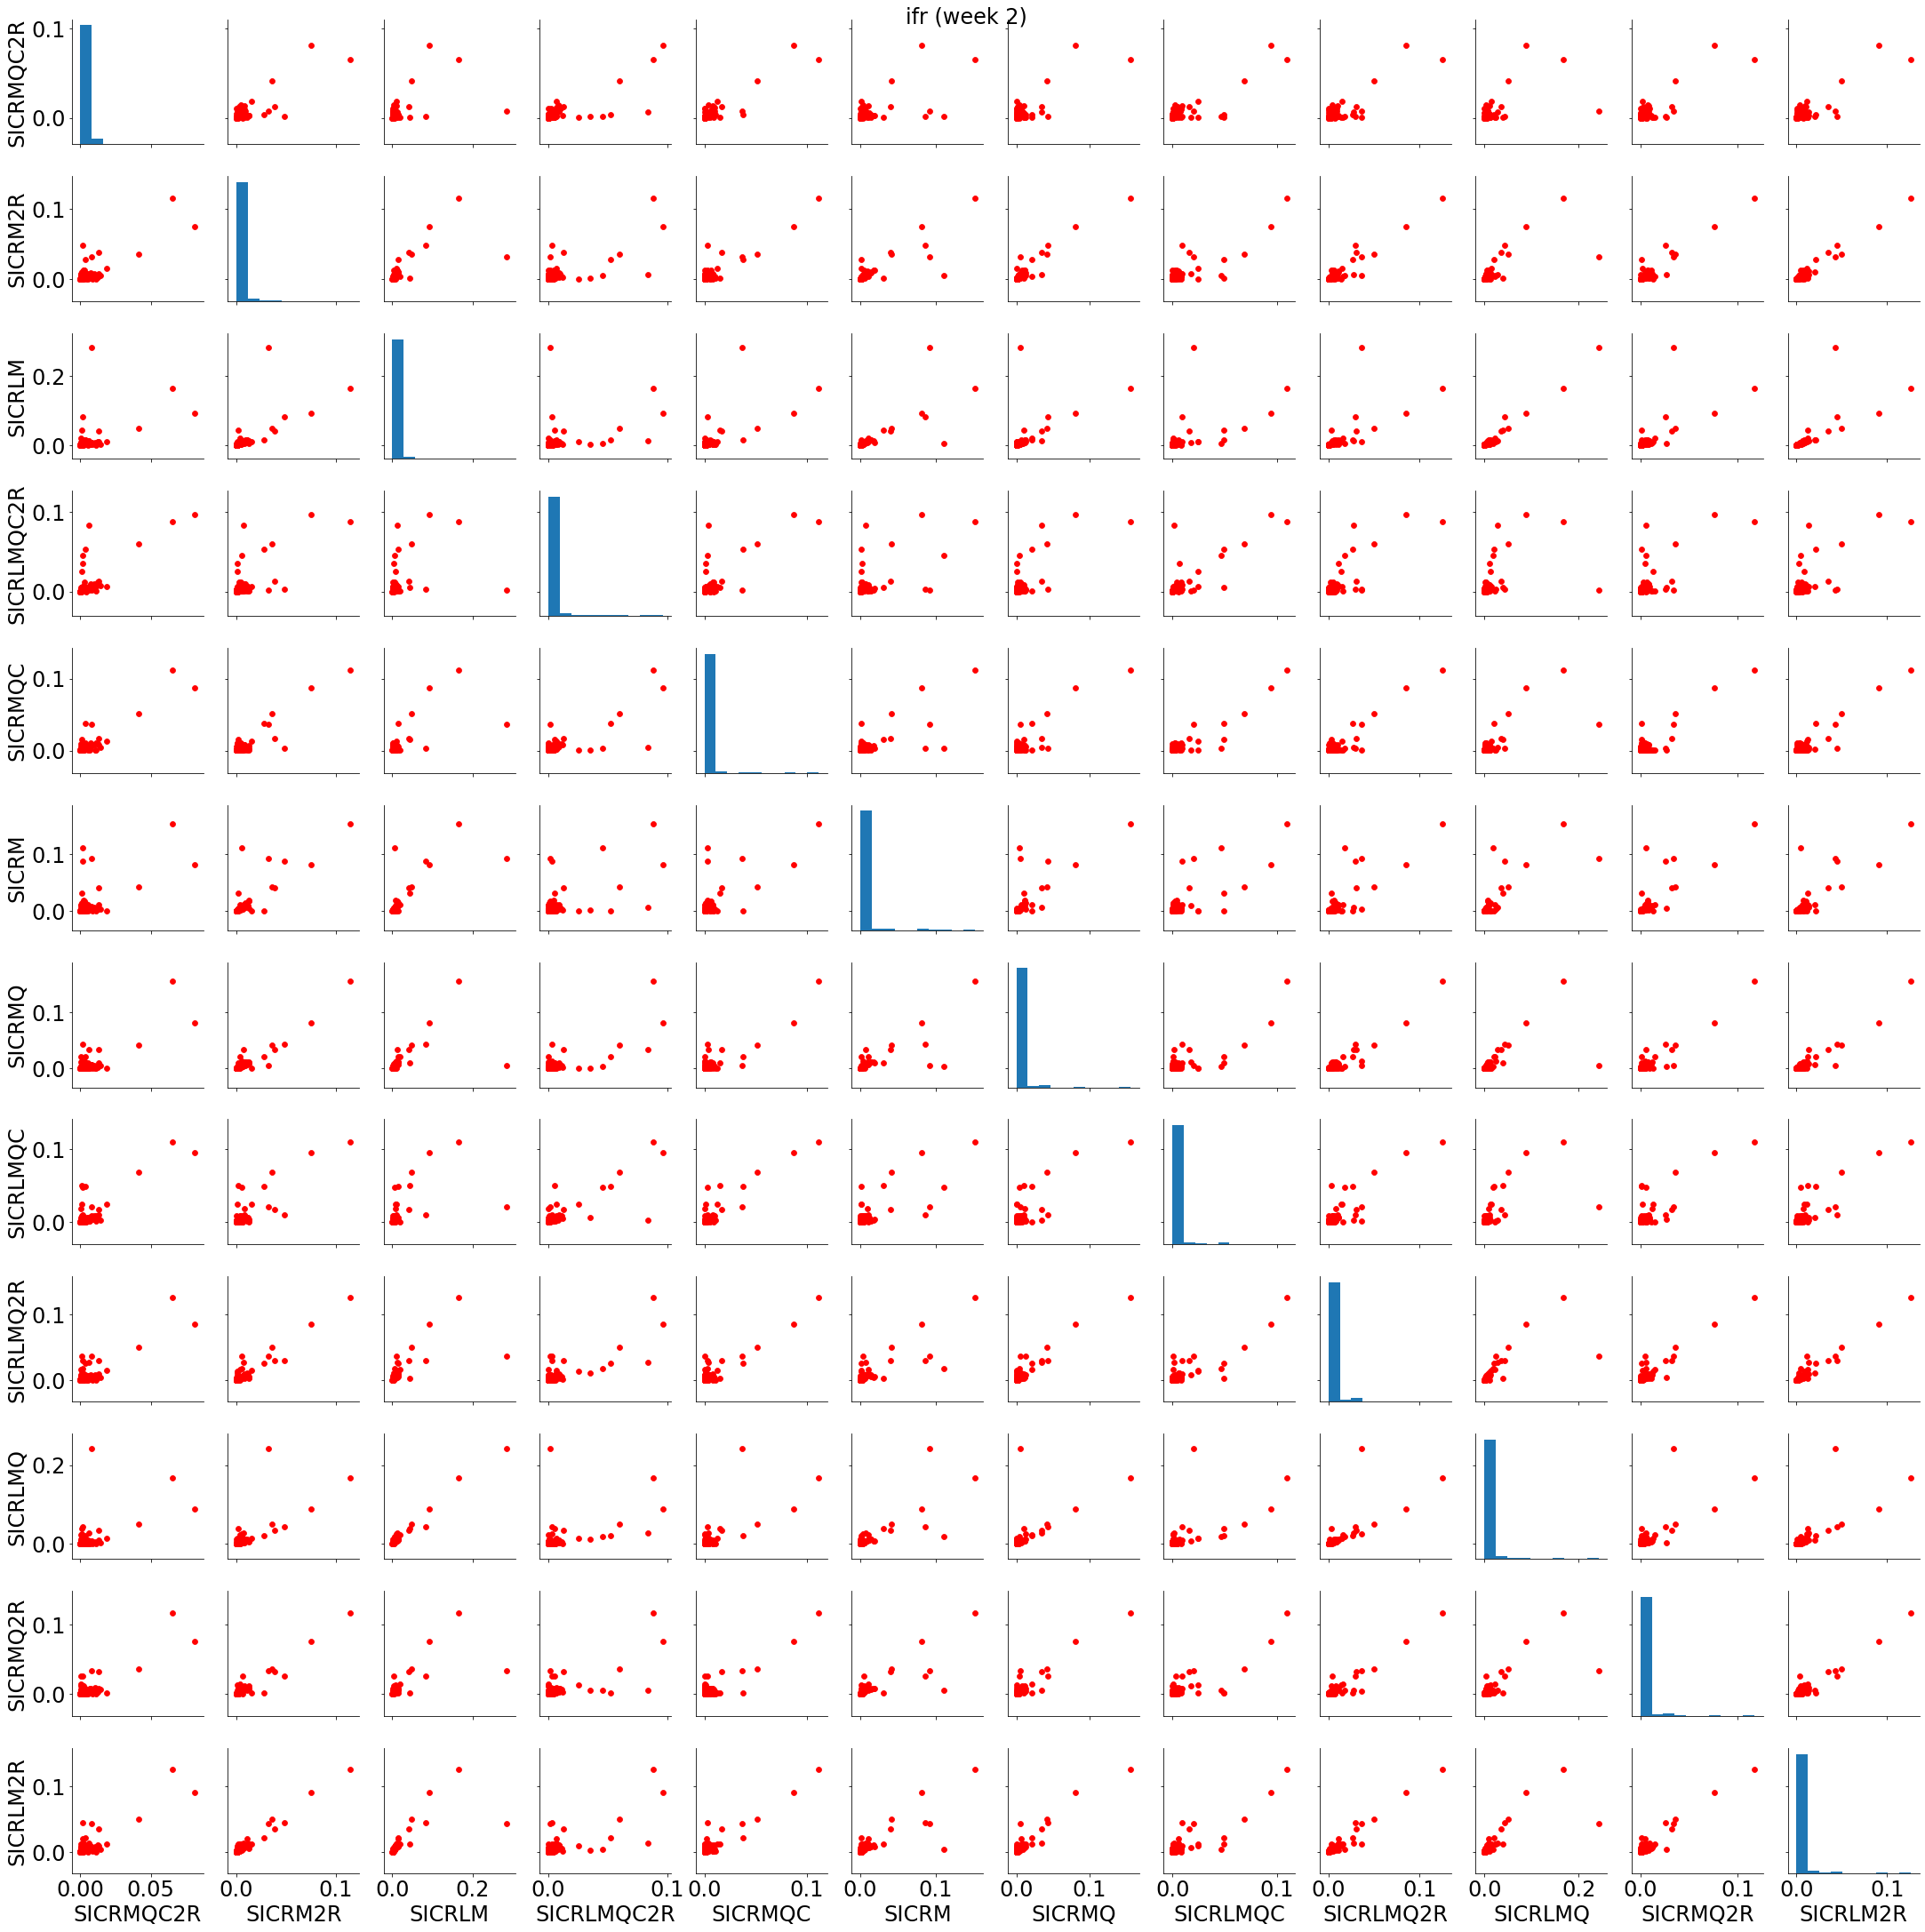

In [10]:
import matplotlib
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 24}

matplotlib.rc('font', **font)
f = sns.pairplot(df2,plot_kws=dict(facecolor="r",edgecolor='r'))
f.fig.suptitle(theta, fontsize=24, y=1)
plt.savefig(productpath + 'pairsplot_'+theta+'.png')